## Group 1: merge and biolink format all tsv files
1. with predicate biolink:physically_interacts_with and biolink:gene_associated_with_condition

2. the corresponding config.json file is: config_bigGIM_interacts_with_associated_with

3. all of them have same cols "subject, predicate, object, agent_type, knowledge_level, knowledge_source, object_category, publications, subject_category"

4. Full list of tsv files handled in this group is:
    - AML.MONDO_descendants.biolink.compliant.05_12_2025.csv
    - AMLKG_Gene_Drug_curie.csv
    - AMLKG_Gene_Disease_curie.csv
    - AMLKG_DrugApproval_curie.csv
    - cell_marker_genes.csv
    - van_galen_cell_type_genes.csv
    - signor_genes.csv
    

In [1]:
## Load necessary packages
import os
import pandas as pd
import glob
import numpy as np
import networkx as nx
# import matplotlib.pyplot as plt

## Define the version number
version_number = "07_13_2025"

## Load files and concatenate them into one merge tsv file

In [2]:
## Notice!! Please change the file path of following codes into your own
raw_files_path = '/Users/Weiqi0/ISB_working/Ilya_lab/Translator/AML_KG_deployment/files/'

## Define the output path for node & edge files after formatting
download_path_node_file = f'/Users/Weiqi0/ISB_working/Ilya_lab/Translator/AML_KG_deployment/biolink_compliant/AMLKG.interacts_with_associated_with.nodes.biolink.compliant.{version_number}.tsv'
download_path_edge_file = f'/Users/Weiqi0/ISB_working/Ilya_lab/Translator/AML_KG_deployment/biolink_compliant/AMLKG.interacts_with_associated_with.edges.biolink.compliant.{version_number}.tsv'

In [3]:
print("The formatted node file will be saved in this path: ", download_path_node_file)
print("The formatted edge file will be saved in this path: ", download_path_edge_file)

The formatted node file will be saved in this path:  /Users/Weiqi0/ISB_working/Ilya_lab/Translator/AML_KG_deployment/biolink_compliant/AMLKG.interacts_with_associated_with.nodes.biolink.compliant.07_13_2025.tsv
The formatted edge file will be saved in this path:  /Users/Weiqi0/ISB_working/Ilya_lab/Translator/AML_KG_deployment/biolink_compliant/AMLKG.interacts_with_associated_with.edges.biolink.compliant.07_13_2025.tsv


In [4]:
## Check all files being read
## Read all AML related files in the path

for f in os.listdir(raw_files_path):
    if f.endswith('.csv'):
        print(f)

AML.MONDO_descendants.biolink.compliant.05_12_2025.csv
AMLKG_Gene_Drug_curie.csv
AMLKG_Gene_Disease_curie.csv
AMLKG_DrugApproval_curie.csv
cell_marker_genes.csv
van_galen_cell_type_genes.csv
signor_genes.csv


## Extract node & edge files from raw input files

In [5]:
# ## Read all tsv files for nodes
# all_files = glob.glob(os.path.join(raw_files_path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
# df_from_each_file = (pd.read_csv(f, sep='\t') for f in all_files)

# node_df = pd.concat(df_from_each_file, ignore_index=True)

# node_df.head(5)

In [6]:
## Read each individual csv files
cell_marker_genes_df = pd.read_csv(raw_files_path + 'cell_marker_genes.csv')

## select only needed columns and separate into node & edge files
cell_marker_genes_edge_df = cell_marker_genes_df[['subject_identifier', 'predicate', 'object_identifier', 
                                                  'knowledge_level', 'anatomical_context_qualifier',
                                                 'Primary_Knowledge_Source', 'object_category', 'publications',
                                                 'subject_category']]
cell_marker_genes_node_subject_df = cell_marker_genes_df[['subject_identifier', 'subject_name', 'subject_category']]
cell_marker_genes_node_object_df = cell_marker_genes_df[['object_identifier', 'object_name', 'object_category']]

## rename those columns into desired format
cell_marker_genes_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
                                                 'subject_category': 'category'}, inplace=True)
cell_marker_genes_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
                                                 'object_category': 'category'}, inplace=True)

cell_marker_genes_edge_df.rename(columns={'subject_identifier': 'subject', 'object_identifier': 'object',
                                          'Primary_Knowledge_Source': 'knowledge_source',
                                         }, inplace=True)

## vertical concatenation
cell_marker_genes_node_df = pd.concat([cell_marker_genes_node_subject_df, cell_marker_genes_node_object_df])

cell_marker_genes_edge_df.head(5)

print(len(cell_marker_genes_edge_df))  # Output file name and number of rows

8390


/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/2540095591.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_marker_genes_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/2540095591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_marker_genes_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/2540095591.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [7]:
## Read each individual csv files
signor_genes_df = pd.read_csv(raw_files_path + 'signor_genes.csv')

## select only needed columns and separate into node & edge files
signor_genes_edge_df = signor_genes_df[['subject_identifier', 'predicate', 'object_identifier', 
                                        'knowledge_level', 'anatomical_context_qualifier',
                                        'Primary_Knowledge_Source', 'object_category', 'publications',
                                        'subject_category']]
signor_genes_node_subject_df = signor_genes_df[['subject_identifier', 'subject_name', 'subject_category']]
signor_genes_node_object_df = signor_genes_df[['object_identifier', 'object_name', 'object_category']]

## rename those columns into desired format
signor_genes_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
                                                 'subject_category': 'category'}, inplace=True)
signor_genes_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
                                                 'object_category': 'category'}, inplace=True)

signor_genes_edge_df.rename(columns={'subject_identifier': 'subject', 'object_identifier': 'object',
                                          'Primary_Knowledge_Source': 'knowledge_source',
                                         }, inplace=True)

## vertical concatenation
signor_genes_node_df = pd.concat([signor_genes_node_subject_df, signor_genes_node_object_df])

signor_genes_edge_df.head(5)

/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/514566763.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signor_genes_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/514566763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signor_genes_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/514566763.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

,subject,predicate,object,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category
0,NCBIGene:1457,upregulates,NCBIGene:11036,knowledge_assertion,NaN,SIGNOR-250870,Gene,PMID:36243968|PMID:12107178,Gene
1,NCBIGene:2932,downregulates,NCBIGene:6688,knowledge_assertion,NaN,SIGNOR-277542,Gene,PMID:36243968|PMID:33188146,Gene
2,NCBIGene:5566,downregulates,NCBIGene:2011,knowledge_assertion,NaN,SIGNOR-276870,Gene,PMID:36243968|PMID:25512381,Gene
3,NCBIGene:5793,downregulates,NCBIGene:6714,knowledge_assertion,NaN,SIGNOR-254725,Gene,PMID:36243968|PMID:25624455,Gene
4,NCBIGene:5592,upregulates,NCBIGene:29109,knowledge_assertion,BTO:0000887;BTO:0001260,SIGNOR-170094,Gene,PMID:36243968|PMID:21106951,Gene


In [8]:
## Read each individual csv files
van_galen_cell_type_genes_df = pd.read_csv(raw_files_path + 'van_galen_cell_type_genes.csv')

## select only needed columns and separate into node & edge files
van_galen_cell_type_genes_edge_df = van_galen_cell_type_genes_df[['subject_identifier', 'predicate', 
                                                                  'object_identifier', 
                                        'knowledge_level',
                                        'Primary_Knowledge_Source', 'object_category', 'publications',
                                        'subject_category']]
van_galen_cell_type_genes_node_subject_df = van_galen_cell_type_genes_df[['subject_identifier', 'subject_name', 'subject_category']]
van_galen_cell_type_genes_node_object_df = van_galen_cell_type_genes_df[['object_identifier', 'object_name', 'object_category']]

## rename those columns into desired format
van_galen_cell_type_genes_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
                                                 'subject_category': 'category'}, inplace=True)
van_galen_cell_type_genes_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
                                                 'object_category': 'category'}, inplace=True)

van_galen_cell_type_genes_edge_df.rename(columns={'subject_identifier': 'subject', 'object_identifier': 'object',
                                          'Primary_Knowledge_Source': 'knowledge_source',
                                         }, inplace=True)

## vertical concatenation
van_galen_cell_type_genes_node_df = pd.concat([van_galen_cell_type_genes_node_subject_df, van_galen_cell_type_genes_node_object_df])

van_galen_cell_type_genes_edge_df.head(5)

/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/2105286000.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  van_galen_cell_type_genes_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/2105286000.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  van_galen_cell_type_genes_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/2105286000.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,subject,predicate,object,knowledge_level,knowledge_source,object_category,publications,subject_category
0,NCBIGene:6691,expressed_in,CL:0000037,statistical_association,NaN,Cell,PMID:30827681,Gene
1,NCBIGene:284,expressed_in,CL:0000037,statistical_association,NaN,Cell,PMID:30827681,Gene
2,NCBIGene:2982,expressed_in,CL:0000037,statistical_association,NaN,Cell,PMID:30827681,Gene
3,NCBIGene:9834,expressed_in,CL:0000037,statistical_association,NaN,Cell,PMID:30827681,Gene
4,NCBIGene:22915,expressed_in,CL:0000037,statistical_association,NaN,Cell,PMID:30827681,Gene


Following are codes for new KG csv files

In [9]:
## Read each individual csv files
## AMLKG_Gene_Drug_curie.csv
AMLKG_Gene_Drug_curie_df = pd.read_csv(raw_files_path + 'AMLKG_Gene_Drug_curie.csv')

## select only needed columns and separate into node & edge files
AMLKG_Gene_Drug_curie_edge_df = AMLKG_Gene_Drug_curie_df[['subject_identifier', 'predicate', 'object_identifier', 
                                        'knowledge_level', 'Primary_Knowledge_Source', 'object_category', 'publications',
                                        'subject_category']]
AMLKG_Gene_Drug_curie_node_subject_df = AMLKG_Gene_Drug_curie_df[['subject_identifier', 'subject_name', 'subject_category']]
AMLKG_Gene_Drug_curie_node_object_df = AMLKG_Gene_Drug_curie_df[['object_identifier', 'object_name', 'object_category']]

## rename those columns into desired format
AMLKG_Gene_Drug_curie_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
                                                 'subject_category': 'category'}, inplace=True)
AMLKG_Gene_Drug_curie_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
                                                 'object_category': 'category'}, inplace=True)

AMLKG_Gene_Drug_curie_edge_df.rename(columns={'subject_identifier': 'subject', 'object_identifier': 'object',
                                          'Primary_Knowledge_Source': 'knowledge_source',
                                         }, inplace=True)

## vertical concatenation
AMLKG_Gene_Drug_curie_node_df = pd.concat([AMLKG_Gene_Drug_curie_node_subject_df, AMLKG_Gene_Drug_curie_node_object_df])

AMLKG_Gene_Drug_curie_edge_df.head(5)

/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/4034448320.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMLKG_Gene_Drug_curie_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/4034448320.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMLKG_Gene_Drug_curie_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/4034448320.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,subject,predicate,object,knowledge_level,knowledge_source,object_category,publications,subject_category
0,NCBIGene:596,associated_with_sensitivity_to,CHEBI:133021,statistical_association,NaN,Drug,PMID: 39280607,Gene
1,NCBIGene:113622,associated_with_sensitivity_to,CHEBI:133021,statistical_association,NaN,Drug,PMID: 39280607,Gene
2,NCBIGene:653073,associated_with_sensitivity_to,CHEBI:133021,statistical_association,NaN,Drug,PMID: 39280607,Gene
3,ENSEMBL:ENSG00000236662,associated_with_sensitivity_to,CHEBI:133021,statistical_association,NaN,Drug,PMID: 39280607,Gene
4,NCBIGene:100421338,associated_with_sensitivity_to,CHEBI:133021,statistical_association,NaN,Drug,PMID: 39280607,Gene


In [10]:
## Read each individual csv files
## AMLKG_Gene_Disease_curie.csv
## AMLKG_DrugApproval_curie.csv
AMLKG_Gene_Disease_curie_df = pd.read_csv(raw_files_path + 'AMLKG_Gene_Disease_curie.csv')

## select only needed columns and separate into node & edge files
AMLKG_Gene_Disease_curie_edge_df = AMLKG_Gene_Disease_curie_df[['subject_identifier', 'predicate', 'object_identifier', 
                                        'knowledge_level', 'Primary_Knowledge_Source', 'object_category', 'publications',
                                        'subject_category']]
AMLKG_Gene_Disease_curie_node_subject_df = AMLKG_Gene_Disease_curie_df[['subject_identifier', 'subject_name', 'subject_category']]
AMLKG_Gene_Disease_curie_node_object_df = AMLKG_Gene_Disease_curie_df[['object_identifier', 'object_name', 'object_category']]

## rename those columns into desired format
AMLKG_Gene_Disease_curie_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
                                                 'subject_category': 'category'}, inplace=True)
AMLKG_Gene_Disease_curie_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
                                                 'object_category': 'category'}, inplace=True)

AMLKG_Gene_Disease_curie_edge_df.rename(columns={'subject_identifier': 'subject', 'object_identifier': 'object',
                                          'Primary_Knowledge_Source': 'knowledge_source',
                                         }, inplace=True)

## vertical concatenation
AMLKG_Gene_Disease_curie_node_df = pd.concat([AMLKG_Gene_Disease_curie_node_subject_df, AMLKG_Gene_Disease_curie_node_object_df])

## need an additional step to change knowledge_level into biolink complaint format and accepted levels
## knowledge_level	knowledge_assertion
## knowledge_level	prediction
## knowledge_level	statistical_association

# Replace values in 'knowledge_level' where...
AMLKG_Gene_Disease_curie_edge_df.loc[AMLKG_Gene_Disease_curie_edge_df['knowledge_level'] == 'observed', 'knowledge_level'] = 'knowledge_assertion'

AMLKG_Gene_Disease_curie_edge_df.head(5)

/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/3490774114.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMLKG_Gene_Disease_curie_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/3490774114.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMLKG_Gene_Disease_curie_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/3490774114.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,subject,predicate,object,knowledge_level,knowledge_source,object_category,publications,subject_category
0,NCBIGene:1788,GeneToDiseaseOrPhenotypicFeatureAssociation,MONDO:0018874,knowledge_assertion,PMID: 32786187,Disease,PMID: 32786187,Gene
1,NCBIGene:7490,GeneToDiseaseOrPhenotypicFeatureAssociation,MONDO:0018874,knowledge_assertion,PMID: 32786187,Disease,PMID: 32786187,Gene
2,NCBIGene:4893,GeneToDiseaseOrPhenotypicFeatureAssociation,MONDO:0018874,knowledge_assertion,PMID: 32786187,Disease,PMID: 32786187,Gene
3,NCBIGene:4853,GeneToDiseaseOrPhenotypicFeatureAssociation,MONDO:0018874,knowledge_assertion,PMID: 32786187,Disease,PMID: 32786187,Gene
4,NCBIGene:54790,GeneToDiseaseOrPhenotypicFeatureAssociation,MONDO:0018874,knowledge_assertion,PMID: 32786187,Disease,PMID: 32786187,Gene


In [11]:
## Read each individual csv files
## AMLKG_DrugApproval_curie.csv
## AMLKG_DrugApproval_curie.csv
AMLKG_DrugApproval_curie_df = pd.read_csv(raw_files_path + 'AMLKG_DrugApproval_curie.csv')

## select only needed columns and separate into node & edge files
AMLKG_DrugApproval_curie_edge_df = AMLKG_DrugApproval_curie_df[['subject_identifier', 'predicate', 'object_identifier', 
                                        'knowledge_level', 'Primary_Knowledge_Source', 'object_category', 'publications',
                                        'subject_category']]
AMLKG_DrugApproval_curie_node_subject_df = AMLKG_DrugApproval_curie_df[['subject_identifier', 'subject_name', 'subject_category']]
AMLKG_DrugApproval_curie_node_object_df = AMLKG_DrugApproval_curie_df[['object_identifier', 'object_name', 'object_category']]

## rename those columns into desired format
AMLKG_DrugApproval_curie_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
                                                 'subject_category': 'category'}, inplace=True)
AMLKG_DrugApproval_curie_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
                                                 'object_category': 'category'}, inplace=True)

AMLKG_DrugApproval_curie_edge_df.rename(columns={'subject_identifier': 'subject', 'object_identifier': 'object',
                                          'Primary_Knowledge_Source': 'knowledge_source',
                                         }, inplace=True)

## vertical concatenation
AMLKG_DrugApproval_curie_node_df = pd.concat([AMLKG_DrugApproval_curie_node_subject_df, AMLKG_DrugApproval_curie_node_object_df])

## need an additional step to change knowledge_level into biolink complaint format and accepted levels
## knowledge_level	knowledge_assertion
## knowledge_level	prediction
## knowledge_level	statistical_association

# Replace values in 'knowledge_level' where...
AMLKG_DrugApproval_curie_edge_df.loc[AMLKG_DrugApproval_curie_edge_df['knowledge_level'] == 'curated', 'knowledge_level'] = 'knowledge_assertion'

AMLKG_DrugApproval_curie_edge_df.head(5)

/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/2766895005.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMLKG_DrugApproval_curie_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/2766895005.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMLKG_DrugApproval_curie_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_87850/2766895005.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,subject,predicate,object,knowledge_level,knowledge_source,object_category,publications,subject_category
0,MONDO:0018874,treated_by,CHEBI:2038,knowledge_assertion,US Food and Drug Administration,Drug,PMID: 32786187,Disease
1,MONDO:0018874,treated_by,CHEBI:28680,knowledge_assertion,https://www.cancer.gov/about-cancer/treatment/...,Drug,NaN,Disease
2,MONDO:0018874,treated_by,CHEBI:41977,knowledge_assertion,https://www.cancer.gov/about-cancer/treatment/...,Drug,NaN,Disease
3,MONDO:0018874,treated_by,UMLS:C4522081,knowledge_assertion,https://www.cancer.gov/about-cancer/treatment/...,Drug,NaN,Disease
4,MONDO:0018874,treated_by,CHEBI:50131,knowledge_assertion,https://www.cancer.gov/about-cancer/treatment/...,Drug,NaN,Disease


In [12]:
## Concatenate to obtain overall node & edge dataframes
# node_df = pd.concat([cell_marker_genes_node_df, signor_genes_node_df, van_galen_cell_type_genes_node_df]).drop_duplicates()
# edge_df = pd.concat([cell_marker_genes_edge_df, signor_genes_edge_df, van_galen_cell_type_genes_edge_df]).drop_duplicates()

list_of_input_node_files = [cell_marker_genes_node_df, signor_genes_node_df, van_galen_cell_type_genes_node_df, 
                            AMLKG_Gene_Drug_curie_node_df, AMLKG_Gene_Disease_curie_node_df, AMLKG_DrugApproval_curie_node_df]

list_of_input_edge_files = [cell_marker_genes_edge_df, signor_genes_edge_df, van_galen_cell_type_genes_edge_df, 
                            AMLKG_Gene_Drug_curie_edge_df, AMLKG_Gene_Disease_curie_edge_df, AMLKG_DrugApproval_curie_edge_df]

node_df = pd.concat(list_of_input_node_files).drop_duplicates()
edge_df = pd.concat(list_of_input_edge_files).drop_duplicates()

edge_df.head(10)

,subject,predicate,object,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category
0,NCBIGene:216,expressed_in,CL:0000037,knowledge_assertion,UBERON:0000178,CellMarker,Cell,PMID:36300619,Gene
1,NCBIGene:100532731,expressed_in,CL:0000037,knowledge_assertion,UBERON:0000178,CellMarker,Cell,PMID:36300619,Gene
2,NCBIGene:914,expressed_in,CL:0000084,knowledge_assertion,UBERON:0005408,CellMarker,Cell,PMID:36300619,Gene
3,NCBIGene:920,expressed_in,CL:0000624,knowledge_assertion,UBERON:0000178,CellMarker,Cell,PMID:36300619,Gene
4,NCBIGene:920,expressed_in,CL:0000492,knowledge_assertion,UBERON:0005408,CellMarker,Cell,PMID:36300619,Gene
5,NCBIGene:920,expressed_in,CL:0000792,knowledge_assertion,UBERON:0005408,CellMarker,Cell,PMID:36300619,Gene
6,NCBIGene:920,expressed_in,NaN,knowledge_assertion,UBERON:0005408,CellMarker,Cell,PMID:36300619,Gene
7,NCBIGene:920,expressed_in,CL:0000902,knowledge_assertion,UBERON:0005408,CellMarker,Cell,PMID:36300619,Gene
8,NCBIGene:920,expressed_in,CL:0000782,knowledge_assertion,UBERON:0000178,CellMarker,Cell,PMID:36300619,Gene
9,NCBIGene:920,expressed_in,CL:0000898,knowledge_assertion,UBERON:0000178,CellMarker,Cell,PMID:36300619,Gene


In [13]:
node_df.head(10)

,id,name,category
0,NCBIGene:216,ALDH1A1,Gene
1,NCBIGene:100532731,BMI1,Gene
2,NCBIGene:914,CD2,Gene
3,NCBIGene:920,CD4,Gene
13,NCBIGene:921,CD5,Gene
14,NCBIGene:923,CD6,Gene
15,NCBIGene:928,CD9,Gene
16,NCBIGene:4695,CD14,Gene
18,NCBIGene:930,CD19,Gene
19,NCBIGene:941,CD80,Gene


In [14]:
## check unique relation
unique_predicate_values = set(list(edge_df['predicate'].unique()) )
print("All possible predicate are here: " , unique_predicate_values)

All possible predicate are here:  {'associated_with_resistance_to', 'expressed_in', 'upregulates', 'unknown', 'GeneToDiseaseOrPhenotypicFeatureAssociation', 'treats', 'downregulates', 'treated_by', 'in_complex', 'associated_with_sensitivity_to'}


In [15]:
## check unique relation
unique_category_values = set(list(edge_df['subject_category'].unique()) + list(edge_df['object_category'].unique()))
print("All possible node category are here: " , unique_category_values)

All possible node category are here:  {'Chemical', 'Ncrna', 'Gene', 'Phenotype', 'Cell', 'Complex', 'Fusion Protein', 'Proteinfamily', 'Disease', 'Drug', 'Smallmolecule', 'Mirna', 'Antibody', 'Stimulus', 'Protein'}


In [16]:
temp = node_df[node_df['category'] == 'Stimulus']

print(temp)

                       id                 name  category
123    SIGNOR:SIGNOR-ST22    Unfolded_Proteins  Stimulus
180     SIGNOR:SIGNOR-ST1           DNA_damage  Stimulus
183    SIGNOR:SIGNOR-ST11                PAMPs  Stimulus
282    SIGNOR:SIGNOR-ST28       Osmotic_stress  Stimulus
559    SIGNOR:SIGNOR-ST20                  ECM  Stimulus
721     SIGNOR:SIGNOR-ST2                  ROS  Stimulus
1461    SIGNOR:SIGNOR-ST7            UV stress  Stimulus
2710   SIGNOR:SIGNOR-ST26  Blood vessel damage  Stimulus
3057    SIGNOR:SIGNOR-ST5           AminoAcids  Stimulus
3110   SIGNOR:SIGNOR-ST17        UVB radiation  Stimulus
3165    SIGNOR:SIGNOR-ST9            ER stress  Stimulus
3915   SIGNOR:SIGNOR-ST13    Cell-Cell_contact  Stimulus
4478   SIGNOR:SIGNOR-ST21          Viral_dsRNA  Stimulus
4799   SIGNOR:SIGNOR-ST12                  GFs  Stimulus
6148   SIGNOR:SIGNOR-ST18                DAMPS  Stimulus
7232   SIGNOR:SIGNOR-ST15     Immune complexes  Stimulus
9799   SIGNOR:SIGNOR-ST16   Ion

## Issues #1
### Plover needs the file to be biolink compliant, so category should always be things like biolink:XXX
* Here instead of "Gene", it should be "biolink:gene"
* The document of full biolink: predicates can be found here: 

In [67]:
## Load the Biolink category and predicate dictionary for mapping subject, object, and predicate types
%run /Users/Weiqi0/ISB_working/Hadlock_lab/QI_ISB_Git_repo/TranslatorPharcogenomicsKG/Pharmagenomics_KG/Biolink_category_and_predication_dictionary.ipynb

Date of last update:  2025-07-08
Order is to always process Node/category map first, since the Edeg/predicate map depends on biolink-complainat node values
-----------------------------------------------------------------------------------------------------------------------------
Dictionary: category_map, Key template: Subject_category or Object_category
------------------------------------------------------------------------------------------
Dictionary: predicate_map, Key template: (Subject_category, Object_category, Predicate)


In [68]:
## depracted, use the mapping from dictionary directly
# node_df['category'] = 'biolink:' + node_df['category'].astype(str)

node_deep_copy_df = node_df.copy(deep=True)

node_deep_copy_df['category'] = (
    node_deep_copy_df['category'].map(category_map)
)

## check unique relation
unique_category_values = set(list(node_deep_copy_df['category'].unique()) )
print("All possible node category are here: " , unique_category_values)

# node_df.head(10)

All possible node category are here:  {'biolink:Noncoding_RNAProduct', 'biolink:EnvironmentalProcess', 'biolink:MacromolecularComplex', 'biolink:ProteinFamily', 'biolink:Drug', 'biolink:Protein', 'biolink:PhenotypicFeature', 'biolink:Disease', 'biolink:SmallMolecule', 'biolink:Cell', 'biolink:MicroRNA', 'biolink:ChemicalEntity', 'biolink:Gene'}


In [69]:
# edge_df['object_category'] = 'biolink:' + edge_df['object_category'].astype(str)
# edge_df.head(5)

In [70]:
# edge_df['subject_category'] = 'biolink:' + edge_df['subject_category'].astype(str)
# edge_df.head(5)

In [71]:
## deep copy a df
edges_deep_copy_df = edge_df.copy(deep=True)

## Then assign subject_category and object_category
edges_deep_copy_df['subject_category'] = (
    edges_deep_copy_df['subject_category'].map(category_map)
)

edges_deep_copy_df['object_category'] = (
    edges_deep_copy_df['object_category'].map(category_map)
)

In [72]:
## check unique values in the predicate column
## Get all unique values from the pandas edge_df's column "predicate"

## depracted
# unique_category_values = edge_df['predicate'].unique()
# print("All possible predicate categories are here: " ,unique_category_values)

## Group by predicate
grouped = edges_deep_copy_df.groupby('predicate')

## For each predicate, output unique (subject_category, object_category) pairs
for predicate, group in grouped:
    print(f"\nPredicate: {predicate}")
    pairs = group[['subject_category', 'object_category']].drop_duplicates()
    for _, row in pairs.iterrows():
        print(f"  ({row['subject_category']}, {row['object_category']})")


Predicate: GeneToDiseaseOrPhenotypicFeatureAssociation
  (biolink:Gene, biolink:Disease)

Predicate: associated_with_resistance_to
  (biolink:Gene, biolink:Drug)

Predicate: associated_with_sensitivity_to
  (biolink:Gene, biolink:Drug)

Predicate: downregulates
  (biolink:Gene, biolink:Gene)
  (biolink:MacromolecularComplex, biolink:Gene)
  (biolink:ChemicalEntity, biolink:Gene)
  (biolink:Gene, biolink:SmallMolecule)
  (biolink:Gene, biolink:ProteinFamily)
  (biolink:SmallMolecule, biolink:Gene)
  (biolink:Gene, biolink:MacromolecularComplex)
  (biolink:EnvironmentalProcess, biolink:Gene)
  (biolink:MacromolecularComplex, biolink:MacromolecularComplex)
  (biolink:Gene, biolink:Protein)
  (biolink:ProteinFamily, biolink:Gene)
  (biolink:ProteinFamily, biolink:ProteinFamily)
  (biolink:ChemicalEntity, biolink:MacromolecularComplex)
  (biolink:Gene, biolink:PhenotypicFeature)
  (biolink:MacromolecularComplex, biolink:SmallMolecule)
  (biolink:Protein, biolink:MicroRNA)
  (biolink:Macrom

In [73]:
## Convert thos predicate values into biolink compliant
## check doc: https://biolink.github.io/biolink-model/related_to_at_instance_level/

## Original row count
print("The original row count: ", edges_deep_copy_df.shape[0])

## Step 1: Remove those with unknown predicate
# Method 1: Boolean indexing
value_to_remove = 'unknown'
edge_df_filtered = edges_deep_copy_df[edges_deep_copy_df['predicate'] != value_to_remove]

print("The row count after filtering: ", edge_df_filtered.shape[0])

## Step 2:
## change expressed_in to biolink:expressed_in
## change upregulates to biolink:upregulated
## change downregulates to biolink:downregulated
## change in_complex to biolink: in_complex_with

## depracted
# Replace values in 'predicate' where...
# edge_df_filtered.loc[edge_df_filtered['predicate'] == 'expressed_in', 'predicate'] = 'biolink:expressed_in'
# edge_df_filtered.loc[edge_df_filtered['predicate'] == 'upregulates', 'predicate'] = 'biolink:upregulated'
# edge_df_filtered.loc[edge_df_filtered['predicate'] == 'downregulates', 'predicate'] = 'biolink:downregulated'
# edge_df_filtered.loc[edge_df_filtered['predicate'] == 'in_complex', 'predicate'] = 'biolink: in_complex_with'
# edge_df_filtered.loc[edge_df_filtered['predicate'] == 'associated_with_sensitivity_to', 'predicate'] = 'biolink:sensitivity_associated_with'
# edge_df_filtered.loc[edge_df_filtered['predicate'] == 'associated_with_resistance_to', 'predicate'] = 'biolink:resistance_associated_with'
# edge_df_filtered.loc[edge_df_filtered['predicate'] == 'GeneToDiseaseOrPhenotypicFeatureAssociation', 'predicate'] = 'biolink:gene_associated_with_condition'
# edge_df_filtered.loc[edge_df_filtered['predicate'] == 'treated_by', 'predicate'] = 'biolink:treated_by'
# edge_df_filtered.loc[edge_df_filtered['predicate'] == 'treats', 'predicate'] = 'biolink:treats'

## Now use the mapping in dictionary directly
edge_df_filtered['predicate'] = edge_df_filtered.apply(
    lambda row: predicate_map.get((row['subject_category'], row['object_category'], row['predicate'])),
    axis=1
)

unique_category_values = edge_df_filtered['predicate'].unique()
print("All possible predicate categories are here: " ,unique_category_values)

The original row count:  47417
The row count after filtering:  46334
All possible predicate categories are here:  ['biolink:expressed_in' 'biolink:regulates' None 'biolink:in_complex_with'
 'biolink:associated_with_sensitivity_to'
 'biolink:associated_with_resistance_to'
 'biolink:GeneToDiseaseOrPhenotypicFeatureAssociation'
 'biolink:treated_by' 'biolink:treats']


/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_51067/1050681308.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edge_df_filtered['predicate'] = edge_df_filtered.apply(


In [74]:
edge_df_filtered.head(5)

,subject,predicate,object,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category
0,NCBIGene:216,biolink:expressed_in,CL:0000037,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene
1,NCBIGene:100532731,biolink:expressed_in,CL:0000037,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene
2,NCBIGene:914,biolink:expressed_in,CL:0000084,knowledge_assertion,UBERON:0005408,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene
3,NCBIGene:920,biolink:expressed_in,CL:0000624,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene
4,NCBIGene:920,biolink:expressed_in,CL:0000492,knowledge_assertion,UBERON:0005408,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene


In [79]:
## Now separate the parsed Mondo csv files into node & edge files
## Read each individual csv files
AML_MONDO_version = '05_12_2025'

AML_MONDO_descendants_df = pd.read_csv(raw_files_path + f'AML.MONDO_descendants.biolink.compliant.{AML_MONDO_version}.csv')

## select only needed columns and separate into node & edge files
AML_MONDO_descendants_edge_df = AML_MONDO_descendants_df[['subject_identifier', 'predicate', 'object_identifier', 
                                        'knowledge_level', 'knowledge_source', 'object_category', 
                                        'subject_category']]
AML_MONDO_descendants_node_subject_df = AML_MONDO_descendants_df[['subject_identifier', 'subject_name', 'subject_category']]
AML_MONDO_descendants_node_object_df = AML_MONDO_descendants_df[['object_identifier', 'object_name', 'object_category']]

## rename those columns into desired format
AML_MONDO_descendants_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
                                                 'subject_category': 'category'}, inplace=True)
AML_MONDO_descendants_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
                                                 'object_category': 'category'}, inplace=True)

AML_MONDO_descendants_edge_df.rename(columns={'subject_identifier': 'subject', 'object_identifier': 'object',
                                         }, inplace=True)

## vertical concatenation
AML_MONDO_descendants_node_df = pd.concat([AML_MONDO_descendants_node_subject_df, AML_MONDO_descendants_node_object_df])

AML_MONDO_descendants_node_df.head(5)

/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_51067/797808609.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AML_MONDO_descendants_node_subject_df.rename(columns={'subject_identifier': 'id', 'subject_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_51067/797808609.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AML_MONDO_descendants_node_object_df.rename(columns={'object_identifier': 'id', 'object_name': 'name',
/var/folders/ml/cjwyk2ps62361rr96_3b_n080000gp/T/ipykernel_51067/797808609.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,id,name,category
0,MONDO:0018874,acute myeloid leukemia,biolink:Disease
1,MONDO:0018874,acute myeloid leukemia,biolink:Disease
2,MONDO:0018874,acute myeloid leukemia,biolink:Disease
3,MONDO:0018874,acute myeloid leukemia,biolink:Disease
4,MONDO:0018874,acute myeloid leukemia,biolink:Disease


In [80]:
## Combine the MONDO subclass nodes and edges into the previous dfs

## Concatenate to obtain overall node & edge dataframes

list_of_input_node_files = [node_deep_copy_df, AML_MONDO_descendants_node_df]

list_of_input_edge_files = [edge_df_filtered, AML_MONDO_descendants_edge_df]

node_concat_df = pd.concat(list_of_input_node_files).drop_duplicates()
edge_concat_df = pd.concat(list_of_input_edge_files).drop_duplicates()

## Issue #2

* Plover needs an id column in the edge file
* Design:
* 1: Based on Gwenlyn's suggestion, create a uuid based on combo of subject, predicate, object, and an added file date entry
* 2: Based on Guangrong's comment, add context_qualifier column in the generation of uuid column, the default value of context_qualifier can be NA


In [81]:
edge_df = edge_concat_df.copy(deep = True)

print(edge_df.shape[0])
## Remove rows where subject or object is empty
# Remove rows where 'Subject' OR 'Object' have NaN values
edge_df = edge_df.dropna(subset=['subject', 'object'])

print(edge_df.shape[0])

print('double check if version number and deploy date are different', version_number)
edge_df['deploy_date'] = "2025-07-13"
edge_df.head(5)

46441
45067
double check if version number and deploy date are different 07_13_2025


,subject,predicate,object,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category,deploy_date
0,NCBIGene:216,biolink:expressed_in,CL:0000037,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13
1,NCBIGene:100532731,biolink:expressed_in,CL:0000037,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13
2,NCBIGene:914,biolink:expressed_in,CL:0000084,knowledge_assertion,UBERON:0005408,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13
3,NCBIGene:920,biolink:expressed_in,CL:0000624,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13
4,NCBIGene:920,biolink:expressed_in,CL:0000492,knowledge_assertion,UBERON:0005408,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13


In [82]:
## add the context_qualifier column
# edge_df['context_qualifier'] = None

## Fill in the first non empty context qualifier found
## removed: 'disease_context_qualifier',
edge_df['context_qualifier'] = edge_df[['anatomical_context_qualifier']].bfill(axis=1).iloc[:, 0]
## if all of them are empty then fill na
edge_df['context_qualifier'] = edge_df['context_qualifier'].fillna(np.nan)
edge_df.head(5)

,subject,predicate,object,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category,deploy_date,context_qualifier
0,NCBIGene:216,biolink:expressed_in,CL:0000037,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13,UBERON:0000178
1,NCBIGene:100532731,biolink:expressed_in,CL:0000037,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13,UBERON:0000178
2,NCBIGene:914,biolink:expressed_in,CL:0000084,knowledge_assertion,UBERON:0005408,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13,UBERON:0005408
3,NCBIGene:920,biolink:expressed_in,CL:0000624,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13,UBERON:0000178
4,NCBIGene:920,biolink:expressed_in,CL:0000492,knowledge_assertion,UBERON:0005408,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13,UBERON:0005408


In [83]:
import uuid
import pandas as pd

## generate uuid from column combination
def generate_uuid_from_columns(df, column_list, namespace=uuid.NAMESPACE_DNS):
    """
    Generates UUIDs based on the values in a specified column of a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_list (list): List of all names of columns to use for UUID generation.
        namespace (uuid.UUID): A UUID namespace (default is uuid.NAMESPACE_DNS).

    Returns:
        pd.Series: A Pandas Series containing the generated UUIDs.
    """
    return df[column_list].apply(lambda x: uuid.uuid5(namespace, str(x)).hex)

def generate_uuid(row):
    """
    Generates a UUID based on the combined values of multiple columns.
    """
    combined_string = ''.join(row.astype(str))
    return uuid.uuid5(uuid.NAMESPACE_DNS, combined_string)

In [84]:
### Add resources_id column, checking whether edge is already

column_list = ['subject', 'predicate', 'object', 'context_qualifier', 'deploy_date']
# Apply the function to each row to generate UUIDs
edge_df['id'] = edge_df[column_list].apply(generate_uuid, axis=1)

# edge_df['id'] = generate_uuid_from_columns(edge_df, column_list)
edge_df.head(5)

,subject,predicate,object,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category,deploy_date,context_qualifier,id
0,NCBIGene:216,biolink:expressed_in,CL:0000037,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13,UBERON:0000178,e595cc90-2b5f-5bd3-8f27-0f21a727606c
1,NCBIGene:100532731,biolink:expressed_in,CL:0000037,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13,UBERON:0000178,e5a76161-035a-5d57-bd4d-d0747dfb216e
2,NCBIGene:914,biolink:expressed_in,CL:0000084,knowledge_assertion,UBERON:0005408,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13,UBERON:0005408,892ad3ce-fd37-59fd-ac53-51c172d60010
3,NCBIGene:920,biolink:expressed_in,CL:0000624,knowledge_assertion,UBERON:0000178,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13,UBERON:0000178,989e61fa-a908-5da4-9785-e25c97436dd4
4,NCBIGene:920,biolink:expressed_in,CL:0000492,knowledge_assertion,UBERON:0005408,CellMarker,biolink:Cell,PMID:36300619,biolink:Gene,2025-07-13,UBERON:0005408,2b19fa60-4696-54ce-8308-559a627e5061


In [88]:
## remove NA or empty strings rows from both subject and object columns
## Drop rows where 'name' is NaN, None, or empty string
edge_df = edge_df[~edge_df['subject'].isna() & (edge_df['subject'].str.strip() != '')]
edge_df = edge_df[~edge_df['object'].isna() & (edge_df['object'].str.strip() != '')]


## throw away those rows which either subject_category, object_category, or predicate is not start with "biolink:" prefix
## since they cannot be biolink-compliant converted
## Keep only rows where all three columns start with 'biolink:'
edge_df = edge_df[
    edge_df['subject_category'].str.startswith('biolink:') &
    edge_df['object_category'].str.startswith('biolink:') &
    edge_df['predicate'].str.startswith('biolink:')
]

node_concat_df = node_concat_df[
    node_concat_df['category'].str.startswith('biolink:')]

In [96]:
## drop duplicates
edge_df = edge_df.drop_duplicates()

## Download the result node and edge file
edge_df.to_csv(download_path_edge_file, sep ='\t', index=False)
node_concat_df.to_csv(download_path_node_file, sep ='\t', index=False)

Now starts the statistical analysis for each version of KGs. 
* No. of nodes,
* No. of edges,  
* All possible categories 
* and distribution of degrees

In [ ]:
print("The formatted node file will be saved in this path: ", download_path_node_file)
print("The formatted edge file will be saved in this path: ", download_path_edge_file)

In [ ]:
# ## Report the total node number
# ## Get all unique values from the pandas node_df's column "name"
# unique_node_values = node_df['name'].unique()

# print("The total node number added for this verion of KG is: ", len(unique_node_values))

In [ ]:
# ## Report the total edge number
# ## Get all unique values from the pandas edge_df's column "id"
# unique_edge_values = edge_df['id'].unique()

# print("The total edge number added for this verion of KG is: ", len(unique_edge_values))

In [89]:
## Get all unique values from the pandas edge_df's column "category"
unique_category_values = edge_df['object_category'].unique()
print("All possible object categories are here: " ,unique_category_values)

All possible object categories are here:  ['biolink:Cell' 'biolink:Gene' 'biolink:PhenotypicFeature'
 'biolink:MacromolecularComplex' 'biolink:SmallMolecule'
 'biolink:ProteinFamily' 'biolink:Protein' 'biolink:Drug'
 'biolink:Disease']


In [90]:
## Get all unique values from the pandas concatenated_df's column "category"
unique_category_values = edge_df['subject_category'].unique()
print("All possible subject categories are here: " ,unique_category_values)

All possible subject categories are here:  ['biolink:Gene' 'biolink:MacromolecularComplex' 'biolink:ChemicalEntity'
 'biolink:Protein' 'biolink:SmallMolecule' 'biolink:ProteinFamily'
 'biolink:EnvironmentalProcess' 'biolink:MicroRNA' 'biolink:Drug'
 'biolink:Noncoding_RNAProduct' 'biolink:Disease']


In [91]:
## Group by predicate
grouped = edge_df.groupby('predicate')

## For each predicate, output unique (subject_category, object_category) pairs
for predicate, group in grouped:
    print(f"\nPredicate: {predicate}")
    pairs = group[['subject_category', 'object_category']].drop_duplicates()
    for _, row in pairs.iterrows():
        print(f"  ({row['subject_category']}, {row['object_category']})")


Predicate: biolink:GeneToDiseaseOrPhenotypicFeatureAssociation
  (biolink:Gene, biolink:Disease)

Predicate: biolink:associated_with_resistance_to
  (biolink:Gene, biolink:Drug)

Predicate: biolink:associated_with_sensitivity_to
  (biolink:Gene, biolink:Drug)

Predicate: biolink:expressed_in
  (biolink:Gene, biolink:Cell)

Predicate: biolink:in_complex_with
  (biolink:ProteinFamily, biolink:MacromolecularComplex)
  (biolink:MacromolecularComplex, biolink:MacromolecularComplex)
  (biolink:SmallMolecule, biolink:MacromolecularComplex)
  (biolink:ChemicalEntity, biolink:MacromolecularComplex)
  (biolink:Protein, biolink:MacromolecularComplex)

Predicate: biolink:regulates
  (biolink:Gene, biolink:Gene)
  (biolink:MacromolecularComplex, biolink:Gene)
  (biolink:MacromolecularComplex, biolink:PhenotypicFeature)
  (biolink:ChemicalEntity, biolink:Gene)
  (biolink:Protein, biolink:Gene)
  (biolink:Gene, biolink:MacromolecularComplex)
  (biolink:SmallMolecule, biolink:Gene)
  (biolink:SmallMo

In [92]:
## Create a graph from the DataFrame
graph = nx.from_pandas_edgelist(edge_df, 'subject', 'object', edge_attr='predicate')

## Print graph information
print('Number of nodes', len(set(graph.nodes)))
print('Number of edges', len(set(graph.edges)))
print('Average degree', sum(dict(graph.degree).values()) / len(graph.nodes))

Number of nodes 10163
Number of edges 29187
Average degree 5.743776443963396


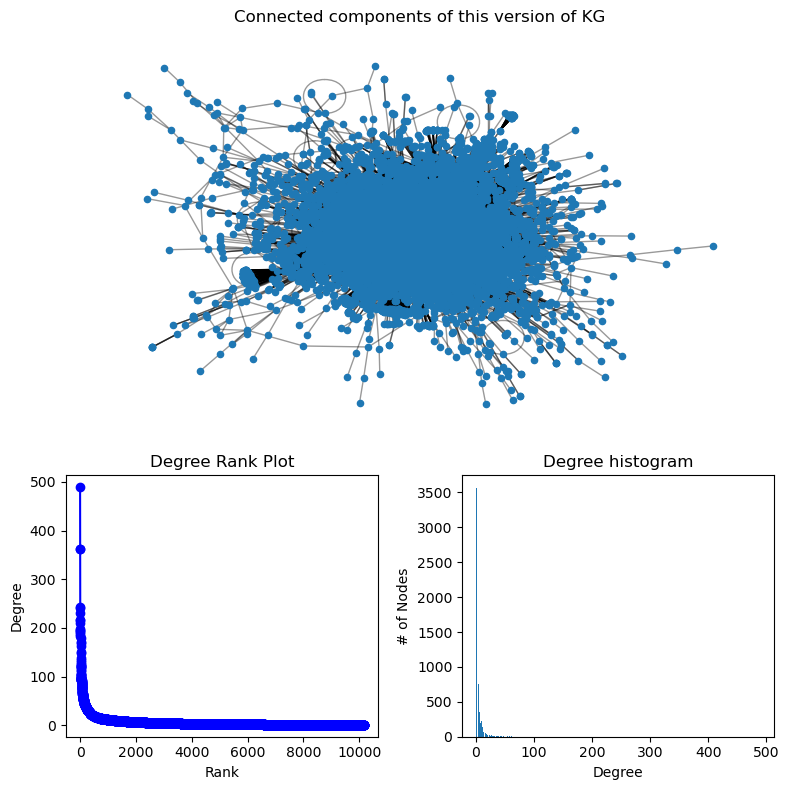

In [95]:
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in graph.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = graph.subgraph(sorted(nx.connected_components(graph), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed = 1984)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of this version of KG")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [98]:
import requests

url = 'https://amlkg.systemsbiology.org:9990/AMLkg/meta_knowledge_graph'
response = requests.get(url)
data = response.json()

In [99]:
print(data)

{'edges': [{'attributes': [{'attribute_type_id': 'object_category', 'constraint_name': 'object category', 'constraint_use': True}, {'attribute_type_id': 'knowledge_source', 'constraint_name': 'knowledge source', 'constraint_use': True}, {'attribute_type_id': 'biolink:knowledge_level', 'constraint_name': 'knowledge level', 'constraint_use': True}, {'attribute_type_id': 'subject_category', 'constraint_name': 'subject category', 'constraint_use': True}, {'attribute_type_id': 'biolink:publications', 'constraint_name': 'publications', 'constraint_use': True}], 'object': 'biolink:Cell', 'predicate': 'biolink:expressed_in', 'qualifiers': [], 'subject': 'biolink:Gene'}, {'attributes': [{'attribute_type_id': 'object_category', 'constraint_name': 'object category', 'constraint_use': True}, {'attribute_type_id': 'knowledge_source', 'constraint_name': 'knowledge source', 'constraint_use': True}, {'attribute_type_id': 'biolink:knowledge_level', 'constraint_name': 'knowledge level', 'constraint_use'